In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
m = [350, 400, 450, 500, 550, 600, 650, 700]
cs10 = [1.818, 1.274, 0.9022, 0.6552, 0.4828, 0.36, 0.2706, 0.2071]
cs10 = [i * 1000 for i in cs10]
cs05 = [0.4545, 0.3185, 0.2255, 0.1638, 0.1207, 0.08999, 0.06764, 0.05178]
cs05 = [i * 1000 for i in cs05]
cs01 = [0.01818, 0.01274, 0.009022, 0.006552, 0.004828, 0.0036, 0.002706, 0.002071]
cs01 = [i * 1000 for i in cs01]

tta = [0.04707, 0.03535, 0.02634, 0.02017, 0.01524, 0.012, 0.009389, 0.007372]
tta = [i * 1000 for i in tta]
tth = [0.0297, 0.02229, 0.01735, 0.01363, 0.01078, 0.008763, 0.007068, 0.005723]
tth = [i * 1000 for i in tth]
dh = [0.00013, 0.00013, 0.0001, 0.000069, 0.000047, 0.00003, 0.000026, 0.000019]
dh = [i * 1000 for i in dh]
da = [0.00022, 0.00023, 0.00016, 0.0001, 0.000074, 0.000031, 0.000035, 0.000029]
da = [i * 1000 for i in da]

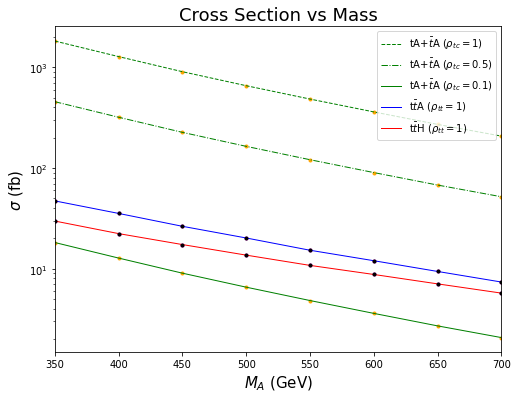

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(m, cs10, marker='.', c = 'orange')
plt.scatter(m, cs05, marker='.', c = 'orange')
plt.scatter(m, cs01, marker='.', c = 'orange')
plt.scatter(m, tta, marker='.', c = 'm')
plt.scatter(m, tth, marker='.', c = 'm')
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(m, cs10, 'g--', label=r'tA+$\bar{t}$A ($\rho_{tc}=1$)', linewidth=1)
plt.plot(m, cs05, 'g-.', label=r'tA+$\bar{t}$A ($\rho_{tc}=0.5$)', linewidth=1)
plt.plot(m, cs01, 'g-', label=r'tA+$\bar{t}$A ($\rho_{tc}=0.1$)', linewidth=1)
plt.plot(m, tta, 'b-', label=r't$\bar{t}$A ($\rho_{tt}=1$)', linewidth=1)
plt.errorbar(m, tth, yerr=dh, fmt='.', color='black', ecolor='lightgray', elinewidth=1, capsize=0)
plt.errorbar(m, tta, yerr=da, fmt='.', color='black', ecolor='lightgray', elinewidth=1, capsize=0)
plt.plot(m, tth, 'r-', label=r't$\bar{t}$H ($\rho_{tt}=1$)', linewidth=1)
plt.title('Cross Section vs Mass', fontsize=18)
plt.xlabel(r'$M_{A}$ (GeV)', fontsize=15)
plt.ylabel(r'$\sigma$ (fb)', fontsize=15)
plt.legend(loc='upper right')
plt.show()

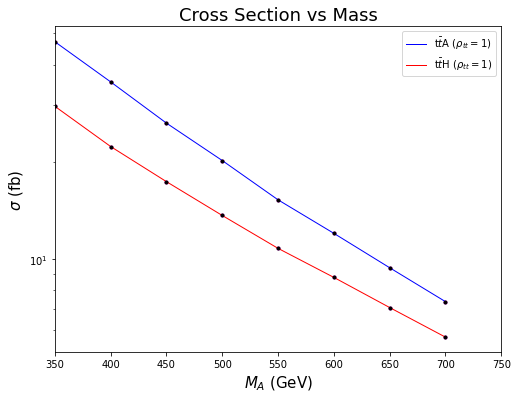

In [4]:
# Testing for its uncertainty
plt.figure(figsize=(8, 6))
plt.scatter(m, tta, marker='.', c = 'm')
plt.scatter(m, tth, marker='.', c = 'm')
plt.xlim(350, 750)
plt.yscale('log')
plt.plot(m, tta, 'b-', label=r't$\bar{t}$A ($\rho_{tt}=1$)', linewidth=1)
plt.errorbar(m, tth, yerr=dh, fmt='.', color='black', ecolor='gray', elinewidth=1, capsize=0);
plt.plot(m, tth, 'r-', label=r't$\bar{t}$H ($\rho_{tt}=1$)', linewidth=1)
plt.errorbar(m, tta, yerr=da, fmt='.', color='black', ecolor='gray', elinewidth=1, capsize=0);
plt.title('Cross Section vs Mass', fontsize=18)
plt.xlabel(r'$M_{A}$ (GeV)', fontsize=15)
plt.ylabel(r'$\sigma$ (fb)', fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [5]:
print(f'MS0 400 \u03C3: {round((0.000077/0.03485)*100, 5)}%')
print(f'MS0 500 \u03C3: {round((0.000043/0.02053)*100, 5)}%')
print(f'MS0 600 \u03C3: {round((0.000025/0.01266)*100, 5)}%')
print(f'MS0 700 \u03C3: {round((0.000016/0.007965)*100, 5)}%')

MS0 400 σ: 0.22095%
MS0 500 σ: 0.20945%
MS0 600 σ: 0.19747%
MS0 700 σ: 0.20088%


In [16]:
ma = np.arange(350, 700+5, 5)
ma

array([350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410,
       415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475,
       480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540,
       545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605,
       610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670,
       675, 680, 685, 690, 695, 700])

In [7]:
def lamda(x, y, z):
    return x**2 + y**2 + z**2 - 2*x*y - 2*y*z - 2*x*z
mt, mc, mu, v, mZ, mh, g, mW, sw, GF, Vtb = 172, 1.29, 2.16*(10**(-3)), 246, 91.19, 125.3, 0.65, 80.35, np.sqrt(0.23), 1.166*(10**(-5)), 0.9999

In [8]:
# A -> ttbar decay
def DecayWidthAtt(rtt, MA, mt, Nc):
    return (Nc* np.sqrt(lamda(MA**2, mt**2, mt**2))) / (8*np.pi*(MA**3)) * ((np.abs(-np.complex(0, rtt)/np.sqrt(2)))**2 * MA**2)
# A -> tcbar+tbarc decay
def DecayWidthAtc(rtc, MA, Nc):
    return Nc*(np.sqrt(lamda(MA**2, mt**2, mc**2)) / (8*np.pi*(MA**3)))*(1/8)*(rtc**2 * (MA**2 - (mt+mc)**2) + (rtc)**2 *(MA**2 - (mt-mc)**2))
# H -> ttbar decay 
def DecayWidthHtt(rtt, MH, mt, Nc):
    return (Nc* np.sqrt(lamda(MH**2, mt**2, mt**2)) / (8*np.pi*MH**3)) * (((1/np.sqrt(2)* rtt)**2 * (MH**2 - (mt+mt)**2)))
# H -> tcbar + tbarc decay
def DecayWidthHtc(rtc, MH, Nc):
    return (Nc*np.sqrt(lamda(MH**2, mt**2, mc**2))/(8*np.pi*MH**3))*(1/8)*(rtc**2 * (MH**2 - (mt+mc)**2) + rtc**2 * (MH**2- (mt-mc)**2))
# A -> tubar+tbaru decay
def DecayWidthAtu(rtu, MA, Nc):
    return Nc*(np.sqrt(lamda(MA**2, mt**2, mu**2)) / (8*np.pi*(MA**3)))*(1/8)*(rtu**2 * (MA**2 - (mt+mu)**2) + (rtu)**2 *(MA**2 - (mt-mu)**2))
# A -> HZ 
def DecayWidthAZH(KAZH, MA, MH):
    return (MA**3) * (KAZH**2) * (lamda(1, ((MH**2/MA**2)), (mZ**2/MA**2)))**(3/2) / (16*np.pi*mZ**2)
def DecayWidthAZh(KAZh, MA, MH):
    return (MA**3) * (KAZh**2) * (lamda(1, ((mh**2/MA**2)), (mZ**2/MA**2)))**(3/2) / (16*np.pi*mZ**2)
# total decay width for A
def DecayWidthAtot(rtt, rtu, rtc, KAZH, KAZh, MA, MH):
    rtotA = 0
    if MA > mt+mc:
        rtotA += 2*DecayWidthAtc(rtc, MA, 3)
    if MA > mt+mu:
        rtotA += 2*DecayWidthAtu(rtu, MA, 3)
    if MA > 2*mt:
        rtotA += DecayWidthAtt(rtt, MA, mt, 3)
    if MH > 0 and MA > MH + mZ:
        rtotA += DecayWidthAZH(KAZH, MA, MH)
    if MH > 0 and MA > mh + mZ:
        rtotA += DecayWidthAZh(KAZh, MA, MH)
    return rtotA
# H -> tubar+tbaru decay
def DecayWidthHtu(rtu, MH, Nc):
    return Nc*(np.sqrt(lamda(MH**2, mt**2, mu**2)) / (8*np.pi*(MH**3)))*(1/8)*(rtu**2 * (MH**2 - (mt+mu)**2) + (rtu)**2 *(MH**2 - (mt-mu)**2))
# H -> AZ
def DecayWidthHZA(KHAZ, MH, MA):
    return (MH)**3 * (KHAZ)**2 * (lamda(1, ((MA**2)/(MH**2)), ((mZ**2)/(MH**2))))**(3/2) / (16*np.pi*mZ**2)
# H -> hh
def DecayWidthHhh(LHhh, MH):
    return (2*LHhh)**2 * (lamda(1, ((mh**2)/(MH**2)), ((mh**2)/(MH**2))))**(1/2) / (32*np.pi*MH)
# total decay width for H
def DecayWidthHtot(rtt, rtu, rtc, KHAZ, LHhh, MA, MH):
    rtotH = 0
    if MH > mt+mc:
        rtotH += 2*DecayWidthHtc(rtc, MH, 3)
    if MH > mt+mu:
        rtotH += 2*DecayWidthHtu(rtu, MH, 3)
    if MH > 2*mt:
        rtotH += DecayWidthHtt(rtt, MH, mt, 3)
    if MH > 0 and MH > MA + mZ:
        rtotH += DecayWidthHZA(KHAZ, MH, MA)
    if MH > 2*mh:
        rtotH += DecayWidthHhh(LHhh, MH)
    return rtotH

In [9]:
DecayWidthAtot(1, 0.1, 0, 0.370372, 0.370372, 350, 0)

3.971473683654787

In [17]:

TotalWidthH_01 = [DecayWidthHtot(1, 0, 0.1, 0.370372, 1, element, element) for element in ma]
TotalWidthH_05 = [DecayWidthHtot(1, 0, 0.5, 0.370372, 1, element, element) for element in ma]
TotalWidthH_10 = [DecayWidthHtot(1, 0, 1, 0.370372, 1, element, element) for element in ma]

TotalWidthA_01 = [DecayWidthAtot(1, 0, 0.1, 0.370372, 0.370372, element, 0) for element in ma]
TotalWidthA_05 = [DecayWidthAtot(1, 0, 0.5, 0.370372, 0.370372, element, 0) for element in ma]
TotalWidthA_10 = [DecayWidthAtot(1, 0, 1, 0.370372, 0.370372, element, 0) for element in ma]


In [11]:
ma = [350, 400, 450, 500, 550, 600, 650, 700]
TotalWidthA_01 = [DecayWidthAtot(0.5, 0, 0.5, 0.370372, 0.370372, element, 0) for element in ma]
TotalWidthA_01

[3.967154671449908,
 7.0107428655158985,
 9.22436709128334,
 11.213177827100834,
 13.082828527759446,
 14.876406896373982,
 16.61674260895226,
 18.317694830971146]

In [18]:
PartialWidthAtt = [DecayWidthAtt(1, element, mt, 3) for element in ma]
PartialWidthAtc_10 = [DecayWidthAtc(1, element, 3)*2 for element in ma]
PartialWidthAtc_05 = [DecayWidthAtc(0.5, element, 3)*2 for element in ma]
PartialWidthAtc_01 = [DecayWidthAtc(0.1, element, 3)*2 for element in ma]
PartialWidthHtt = [DecayWidthHtt(1, element, mt, 3) for element in ma]
PartialWidthHtc_10 = [DecayWidthHtc(1, element, 3)*2 for element in ma]
PartialWidthHtc_05 = [DecayWidthHtc(0.5, element, 3)*2 for element in ma]
PartialWidthHtc_01 = [DecayWidthHtc(0.1, element, 3)*2 for element in ma]

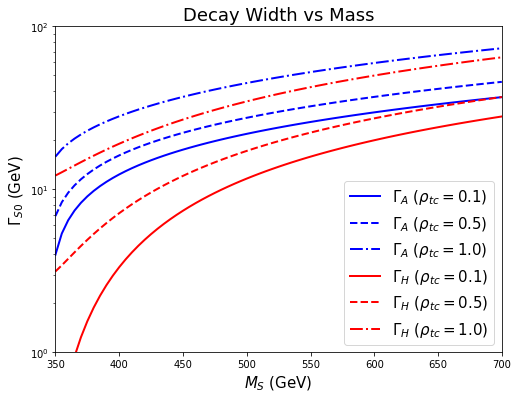

In [19]:
plt.figure(figsize=(8, 6))
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(ma, TotalWidthA_01, 'b-', label=r'$\Gamma_{A}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, TotalWidthA_05, 'b--', label=r'$\Gamma_{A}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, TotalWidthA_10, 'b-.', label=r'$\Gamma_{A}$ ($\rho_{tc}=1.0$)', linewidth=2)
plt.plot(ma, TotalWidthH_01, 'r-', label=r'$\Gamma_{H}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, TotalWidthH_05, 'r--', label=r'$\Gamma_{H}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, TotalWidthH_10, 'r-.', label=r'$\Gamma_{H}$ ($\rho_{tc}=1.0$)', linewidth=2)
plt.title('Decay Width vs Mass', fontsize=18)
plt.xlabel(r'$M_{S}$ (GeV)', fontsize=15)
plt.ylabel(r'$\Gamma_{S0}$ (GeV)', fontsize=15)
plt.ylim(1, 100)
plt.legend(loc='lower right', prop={'size': 15})
plt.show()
#plt.savefig('DWvsMS0')

In [20]:
br_att_01 = [b / m for b,m in zip(PartialWidthAtt, TotalWidthA_01)]
br_att_05 = [b / m for b,m in zip(PartialWidthAtt, TotalWidthA_05)]
br_att_10 = [b / m for b,m in zip(PartialWidthAtt, TotalWidthA_10)]
br_atc_01 = [b / m for b,m in zip(PartialWidthAtc_01, TotalWidthA_01)]
br_atc_05 = [b / m for b,m in zip(PartialWidthAtc_05, TotalWidthA_05)]
br_atc_10 = [b / m for b,m in zip(PartialWidthAtc_10, TotalWidthA_10)]
br_htt_01 = [b / m for b,m in zip(PartialWidthHtt, TotalWidthH_01)]
br_htt_05 = [b / m for b,m in zip(PartialWidthHtt, TotalWidthH_05)]
br_htt_10 = [b / m for b,m in zip(PartialWidthHtt, TotalWidthH_10)]
br_htc_01 = [b / m for b,m in zip(PartialWidthHtc_01, TotalWidthH_01)]
br_htc_05 = [b / m for b,m in zip(PartialWidthHtc_05, TotalWidthH_05)]
br_htc_10 = [b / m for b,m in zip(PartialWidthHtc_10, TotalWidthH_10)]

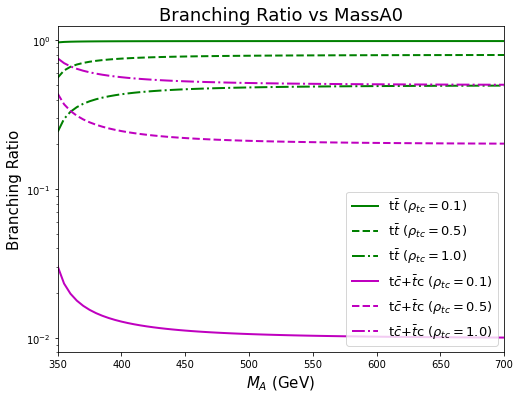

In [21]:
plt.figure(figsize=(8, 6))
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(ma, br_att_01, 'g-', label=r't$\bar{t}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_att_05, 'g--', label=r't$\bar{t}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_att_10, 'g-.', label=r't$\bar{t}$ ($\rho_{tc}=1.0$)', linewidth=2)
plt.plot(ma, br_atc_01, 'm-', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_atc_05, 'm--', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_atc_10, 'm-.', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=1.0$)', linewidth=2)
plt.title('Branching Ratio vs MassA0', fontsize=18)
plt.xlabel(r'$M_{A}$ (GeV)', fontsize=15)
plt.ylabel('Branching Ratio', fontsize=15)
#plt.ylim(0.01, 1)
plt.legend(loc='lower right', prop={'size': 13})
plt.show()
#plt.savefig('BRvsMA0.png')

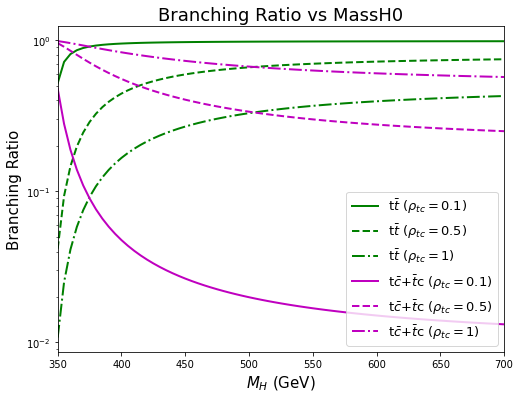

In [22]:
plt.figure(figsize=(8, 6))
plt.xlim(350, 700)
plt.yscale('log')
plt.plot(ma, br_htt_01, 'g-', label=r't$\bar{t}$ ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_htt_05, 'g--', label=r't$\bar{t}$ ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_htt_10, 'g-.', label=r't$\bar{t}$ ($\rho_{tc}=1$)', linewidth=2)
plt.plot(ma, br_htc_01, 'm-', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.1$)', linewidth=2)
plt.plot(ma, br_htc_05, 'm--', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=0.5$)', linewidth=2)
plt.plot(ma, br_htc_10, 'm-.', label=r't$\bar{c}$+$\bar{t}$c ($\rho_{tc}=1$)', linewidth=2)
plt.title('Branching Ratio vs MassH0', fontsize=18)
plt.xlabel(r'$M_{H}$ (GeV)', fontsize=15)
plt.ylabel('Branching Ratio', fontsize=15)
#plt.ylim(0.01, 1)
plt.legend(loc='lower right', prop={'size': 13})
plt.show()
#plt.savefig('BRvsMH0.png')

In [23]:
SS2l = [0.0003606, 0.0002733, 0.0002011, 0.0001397, 0.0001089, 0.00008045, 0.00005885, 0.00004688]
SS2l = [i * 1000 for i in SS2l]

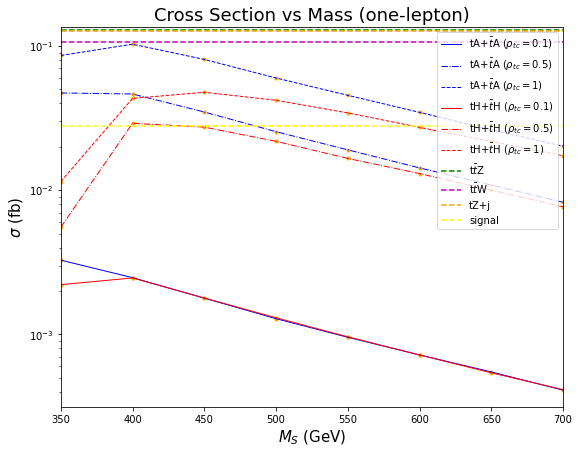

In [24]:
m = [350, 400, 450, 500, 550, 600, 650, 700]
a1l_01 = [0.003275, 0.002476, 0.001785, 0.001286, 0.0009556, 0.0007211, 0.0005495, 0.000411]
a1l_05 = [0.04729, 0.04653, 0.03488, 0.02549, 0.01907, 0.01429, 0.01086, 0.008253]
a1l_10 = [0.08605, 0.1031, 0.0808, 0.06005, 0.04556, 0.03471, 0.02625, 0.02022]
h1l_01 = [0.002214, 0.002465, 0.001788, 0.001305, 0.0009624, 0.0007206, 0.0005417, 0.0004141]
h1l_05 = [0.005547, 0.02914, 0.02741, 0.02185, 0.01663, 0.01305, 0.01002, 0.007685]
h1l_10 = [0.01149, 0.04338, 0.04782, 0.0421, 0.0344, 0.02731, 0.02181, 0.01736]

plt.figure(figsize=(9, 7))
plt.scatter(m, a1l_01, marker='.', c = 'orange')
plt.scatter(m, a1l_05, marker='.', c = 'orange')
plt.scatter(m, a1l_10, marker='.', c = 'orange')
plt.scatter(m, h1l_01, marker='.', c = 'orange')
plt.scatter(m, h1l_05, marker='.', c = 'orange')
plt.scatter(m, h1l_10, marker='.', c = 'orange')

plt.xlim(350, 700)
plt.yscale('log')
plt.plot(m, a1l_01, 'b-', label=r'tA+$\bar{t}$A ($\rho_{tc}=0.1$)', linewidth=1)
plt.plot(m, a1l_05, 'b-.', label=r'tA+$\bar{t}$A ($\rho_{tc}=0.5$)', linewidth=1)
plt.plot(m, a1l_10, 'b--', label=r'tA+$\bar{t}$A ($\rho_{tc}=1$)', linewidth=1)
plt.plot(m, h1l_01, 'r-', label=r'tH+$\bar{t}$H ($\rho_{tc}=0.1$)', linewidth=1)
plt.plot(m, h1l_05, 'r-.', label=r'tH+$\bar{t}$H ($\rho_{tc}=0.5$)', linewidth=1)
plt.plot(m, h1l_10, 'r--', label=r'tH+$\bar{t}$H ($\rho_{tc}=1$)', linewidth=1)
plt.axhline(y=0.1298, color='g', linestyle='--', label=r't$\bar{t}$Z')
plt.axhline(y=0.1059, color='m', linestyle='--', label=r't$\bar{t}$W')
plt.axhline(y=0.1275, color='orange', linestyle='--', label=r'tZ+j')
plt.axhline(y=0.02802, color='yellow', linestyle='--', label=r'signal')


plt.title('Cross Section vs Mass (one-lepton)', fontsize=18)
plt.xlabel(r'$M_{S}$ (GeV)', fontsize=15)
plt.ylabel(r'$\sigma$ (fb)', fontsize=15)
plt.legend(loc='upper right')
plt.show()

[[350 400 450 500 550 600 650 700]
 [350 400 450 500 550 600 650 700]
 [350 400 450 500 550 600 650 700]] [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1.  1.  1.  1. ]]


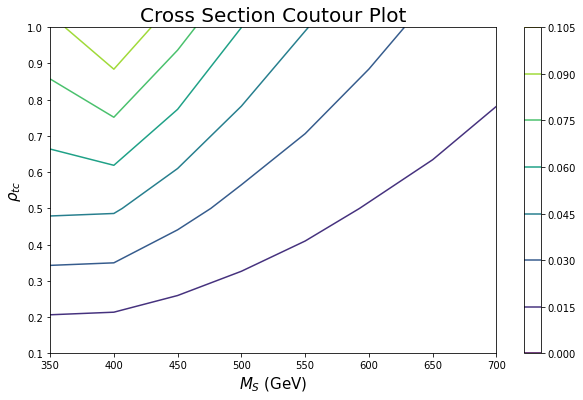

In [60]:
m = [350, 400, 450, 500, 550, 600, 650, 700]
Z = np.array([[0.003275, 0.002476, 0.001785, 0.001286, 0.0009556, 0.0007211, 0.0005495, 0.000411],
              [0.04729, 0.04653, 0.03488, 0.02549, 0.01907, 0.01429, 0.01086, 0.008253],
              [0.08605, 0.1031, 0.0808, 0.06005, 0.04556, 0.03471, 0.02625, 0.02022]])

x = np.array([0.1, 0.5, 1])
x = x.T
X, Y = np.meshgrid(m, x)
print(X, Y)
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z)
plt.ylim(0.1, 1)
plt.xlabel(r'$M_{S}$ (GeV)', fontsize=15)
plt.ylabel(r'$\rho_{tc}$', fontsize=15)
plt.title('Cross Section Coutour Plot', fontsize=20)
plt.colorbar()
plt.show()